In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [ ]:
# !gdown --id 1TVmI7nhTLjdd_6ghEcjLp_9wW0HWi2oa

In [ ]:
# ! unzip '/content/FinalProjectMat.zip'

In [ ]:
print('artifacts')
print(len(os.listdir('artifacts')))
print('piano_pieces')
print(len(os.listdir('piano_pieces')))
print('piano_triads')
print(len(os.listdir('piano_triads')))

artifacts
40
piano_pieces
400
piano_triads
432


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from scipy import signal
from IPython.display import Audio, Image
from PIL import Image, ImageDraw
import librosa
import librosa.display
import pylab
from numpy.fft import fft, ifft
%matplotlib inline
import math

In [ ]:
notes = os.listdir('piano_triads')
artifacts = os.listdir('artifacts')

In [ ]:
import librosa
import IPython as ip
import random

In [ ]:
general_rate, fist_temp = read('piano_triads/G_min_7_1.wav')
temps = []

for i in notes:
  fav, temp = read('piano_triads/' + i)
  temps.append(temp)

In [ ]:
###takes longer
# fav_first, general_rate = librosa.load('piano_triads/G_min_7_1.wav', mono=True )
# temps = []
# count = 0
# for i in notes:
#   print(count)
#   count = count + 1
#   fav, temp = y1, sample_rate1 = librosa.load('piano_triads/' + i, mono=True)
#   temps.append(temp)

In [ ]:
temps_array = np.array(temps)

In [ ]:
random.randint(1,6)

3

In [ ]:
noise = random.sample(notes, 1)

In [ ]:
general_rate

44100

In [ ]:
#data augmentation
for i in range(2000):
  if(i%50==0):
    print(i)
  index = random.randint(0,len(notes)-1)
  y1, sample_rate1 = librosa.load('piano_triads/' + notes[index], sr=general_rate)
  noise = random.sample(artifacts, 1)
  y2, sample_rate2 = librosa.load('artifacts/' + noise[0], mono=True)

  merged = (y1+y2[:len(y1)])/(2)
  temps_array = np.append(temps_array, merged.reshape(1,merged.shape[0]),axis=0)
  notes.append(notes[index])


0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950


In [ ]:
#temps_array[-2]

In [ ]:
ip.display.Audio(temps_array[-2], rate=general_rate)

In [ ]:
print(temps_array)
print(temps_array.shape)
print(temps_array.dtype)

[[ 4.6208461e-07  5.5334834e-07 -1.0540784e-05 ... -1.0913832e-06
   2.3535229e-06  1.0014210e-06]
 [-1.1381313e-07  1.9138425e-07 -1.4120275e-06 ... -3.0241883e-05
  -3.0229494e-05 -3.0668649e-05]
 [ 1.6316169e-07  3.6565707e-06  1.3881377e-05 ...  3.0523166e-05
   3.3623237e-05  3.8477028e-05]
 ...
 [ 1.2839012e-03  2.6860384e-03  2.1202250e-03 ...  3.1682528e-05
   3.2426644e-05  3.1743079e-05]
 [-3.2716651e-02 -2.3325868e-02  1.0578788e-02 ... -3.6217248e-01
  -3.5767084e-01 -3.5151044e-01]
 [-5.0666617e-06  1.1289175e-06  2.0019511e-06 ...  1.1583909e-03
   5.0991826e-04  1.0633974e-03]]
(2432, 132300)
float32


In [ ]:
print(temps_array[0])
print(notes[0])

[ 4.6208461e-07  5.5334834e-07 -1.0540784e-05 ... -1.0913832e-06
  2.3535229e-06  1.0014210e-06]
C_maj_7_1.wav


In [ ]:
notes = np.array(notes)

In [ ]:
len(notes)

2432

In [ ]:
notes

array(['C_maj_7_1.wav', 'Gs_maj_2_1.wav', 'D_min_4_1.wav', ...,
       'G_maj_3_0.wav', 'Eb_maj_4_0.wav', 'C_maj_3_1.wav'], dtype='<U14')

In [ ]:
spilited = np.char.split(notes, sep ='_')

In [ ]:
spilited[0]

['C', 'maj', '7', '1.wav']

In [ ]:
len(spilited)

2432

In [ ]:
type(spilited)

numpy.ndarray

In [ ]:
spilited = list(spilited)

In [ ]:
spilited = np.array(spilited)

In [ ]:
spilited[:, 0]

array(['C', 'Gs', 'D', ..., 'G', 'Eb', 'C'], dtype='<U5')

In [ ]:
spilited[0]

array(['C', 'maj', '7', '1.wav'], dtype='<U5')

In [ ]:
temp_array = []
new_list = []
# temp = songs_list[0] + "_" + songs_list[1]
# temp_array.append([temp, songs_list[2], songs_list[3]])
for i in spilited:
    temp = i[0] + "_" + i[1]
    temp_array.append([temp, i[2], i[3]])
new_list.append(temp_array)

In [ ]:
new_list = np.reshape(np.array(new_list),(len(notes),3))

In [ ]:
new_list[:,0]

array(['C_maj', 'Gs_maj', 'D_min', ..., 'G_maj', 'Eb_maj', 'C_maj'],
      dtype='<U6')

In [ ]:
original_labels = np.copy(new_list[:, 0])

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(new_list[:, 0])
new_list[:, 0] = le.transform(new_list[:, 0])

In [ ]:
notes_labeled = []
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(notes)
notes_labeled = le.transform(notes)

In [ ]:
original_labels[0]

'C_maj'

In [ ]:
new_list[0]

array(['10', '7', '1.wav'], dtype='<U6')

In [ ]:
chord_labels = new_list[:, 0]

In [ ]:
chord_labels = chord_labels.astype(int)

In [ ]:
chord_labels.max()

35

In [ ]:
np.where(chord_labels == 0)[0][0]

64

In [ ]:
original_labels[56]

'G_maj'

In [ ]:
labels = []
for i in range(36):
  index = np.where(chord_labels == i)[0][0]
  labels.append(original_labels[index])

In [ ]:
labels

['A_dim',
 'A_maj',
 'A_min',
 'B_dim',
 'B_maj',
 'B_min',
 'Bb_dim',
 'Bb_maj',
 'Bb_min',
 'C_dim',
 'C_maj',
 'C_min',
 'Cs_dim',
 'Cs_maj',
 'Cs_min',
 'D_dim',
 'D_maj',
 'D_min',
 'E_dim',
 'E_maj',
 'E_min',
 'Eb_dim',
 'Eb_maj',
 'Eb_min',
 'F_dim',
 'F_maj',
 'F_min',
 'Fs_dim',
 'Fs_maj',
 'Fs_min',
 'G_dim',
 'G_maj',
 'G_min',
 'Gs_dim',
 'Gs_maj',
 'Gs_min']

In [ ]:
spilited = new_list

In [ ]:
# reversed = le.inverse_transform(new_list[:,0])

In [ ]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(spilited[:, 1])
# spilited[:, 1] = le.transform(spilited[:, 1])

In [ ]:
last_col = np.char.split(spilited[:, 2], sep ='.')

In [ ]:
last_col[0:5]

array([list(['1', 'wav']), list(['1', 'wav']), list(['1', 'wav']),
       list(['0', 'wav']), list(['1', 'wav'])], dtype=object)

In [ ]:
last_col = np.array(list(last_col))

In [ ]:
last_col[0:5, 0]

array(['1', '1', '1', '0', '1'], dtype='<U3')

In [ ]:
spilited[:, 2] = last_col[:,0]

In [ ]:
spilited

array([['10', '7', '1'],
       ['34', '2', '1'],
       ['17', '4', '1'],
       ...,
       ['31', '3', '0'],
       ['22', '4', '0'],
       ['10', '3', '1']], dtype='<U6')

In [ ]:
spilited = spilited.astype(int)

In [ ]:
spilited[:,0].max()

35

In [ ]:
# Reshape_Concat = temps_array.reshape(temps_array.shape[0],temps_array.shape[1],1,1)

In [ ]:
all_labels = []
for i in range(notes_labeled.max()):
  index = np.where(notes_labeled == i)[0][0]
  all_labels.append(notes[index])

In [ ]:
all_labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(temps_array, notes_labeled, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
X_train = X_train / 255.
X_test = X_test / 255.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [ ]:
def encoder(data):
  values = np.array(data)
  # integer encode
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(values)
  # binary encode
  onehot_encoder = OneHotEncoder(sparse=False)
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
  onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
  return onehot_encoded

In [ ]:
# output1 = encoder(y_train[:,0])
# output2 = np.array(encoder(y_train[:,1]))
# output3 = np.array(encoder(y_train[:,2]))


In [ ]:
output = encoder(np.concatenate((y_train,y_test), axis=0))
train_out = output[:y_train.shape[0]]
test_out = output[y_train.shape[0]:]

In [ ]:
from keras.regularizers import l2
from keras.layers import BatchNormalization, Dropout

In [ ]:
from keras.models import Model
from keras.layers import BatchNormalization
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Lambda
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
import tensorflow as tf


In [ ]:
# model = Sequential()
# model.add(Flatten(input_shape=[132300,]))
# model.add(Dense(64, activation="relu"))
# # model.add(Dropout(0.3))
# # model.add(Dense(128, activation="relu"))
# # model.add(Dropout(0.3))
# model.add(Dense(64, activation="relu"))
# model.add(Dropout(0.3))
# model.add(Dense(4, activation='softmax'))

# opt = keras.optimizers.Adam(learning_rate=0.01)
# model.compile(loss="categorical_crossentroy",optimizer=opt, metrics=['accuracy'])

In [ ]:
from keras.models import Model
from tensorflow.keras import regularizers

In [ ]:
def one_branch(inputs, num):
    
    # x = Conv1D(16, 3, padding="same")(inputs)
    # x = Activation("relu")(x)
    # x = BatchNormalization(axis=-1)(x)
    # x = MaxPooling1D(pool_size=(3))(x)
    # x = Dropout(0.25)(x)
    # x = Conv1D(32, (3), padding="same")(x)
    # x = Activation("relu")(x)
    # x = BatchNormalization(axis=-1)(x)
    # x = MaxPooling1D(pool_size=(2))(x)
    # x = Dropout(0.25)(x)
    # x = Conv1D(32, (3), padding="same")(x)
    # x = Activation("relu")(x)
    # x = BatchNormalization(axis=-1)(x)
    # x = MaxPooling1D(pool_size=(2))(x)
    # x = Dropout(0.25)(x)

    x = Flatten()(inputs)
    x = Dense(256)(x)
    x = Activation("relu")(x)
    x = Dropout(0.5)(x)
    x = Dense(512)(x)
    x = Activation("relu")(x)
    x = Dropout(0.5)(x)
    x = Dense(512)(x)
    x = Activation("relu")(x)
    x = Dropout(0.5)(x)
    x = Dense(256)(x)
    x = Activation("relu")(x)
    x = Dropout(0.5)(x)
    x = Dense(num)(x)
    x = Activation("softmax", name="branch_one")(x)
    return x

def two_branch(inputs, num_races):

    x = inputs
    x = Flatten()(x)
    x = Dense(256)(x)
    x = Activation("relu")(x)
    x = Dropout(0.3)(x)
    x = Dense(128)(x)
    x = Activation("relu")(x)
    x = Dropout(0.3)(x)
    x = Dense(num_races)(x)
    x = Activation("softmax", name="branch_two")(x)
    return x

def three_branch(inputs, num_races):

    x = inputs
    x = Flatten()(x)
    x = Dense(256)(x)
    x = Activation("relu")(x)
    x = Dropout(0.3)(x)
    x = Dense(128)(x)
    x = Activation("relu")(x)
    x = Dropout(0.3)(x)
    x = Dense(num_races)(x)
    x = Activation("sigmoid", name="branch_three")(x)
    return x

def four_branch(inputs, num_races):

    x = inputs
    x = Flatten()(x)
    x = Dense(256)(x)
    x = Activation("relu")(x)
    # x = Dropout(0.5)(x)
    x = Dense(128)(x)
    x = Activation("relu")(x)
    # x = Dropout(0.5)(x)
    x = Dense(num_races)(x)
    x = Activation("softmax", name="branch_four")(x)
    return x

input_shape = (132300,1)
inputs = Input(shape=input_shape)
# age_branch = build_age_branch(inputs)
# race_branch = build_race_branch(inputs, 5)
# gender_branch = build_gender_branch(inputs)
one = one_branch(inputs, train_out.shape[1])
# two = two_branch(inputs, output2.shape[1])
# three = three_branch(inputs, 1)
# four = four_branch(inputs, output4.shape[1])
model = Model(inputs=inputs,
            outputs = one)

In [ ]:
from tensorflow import keras

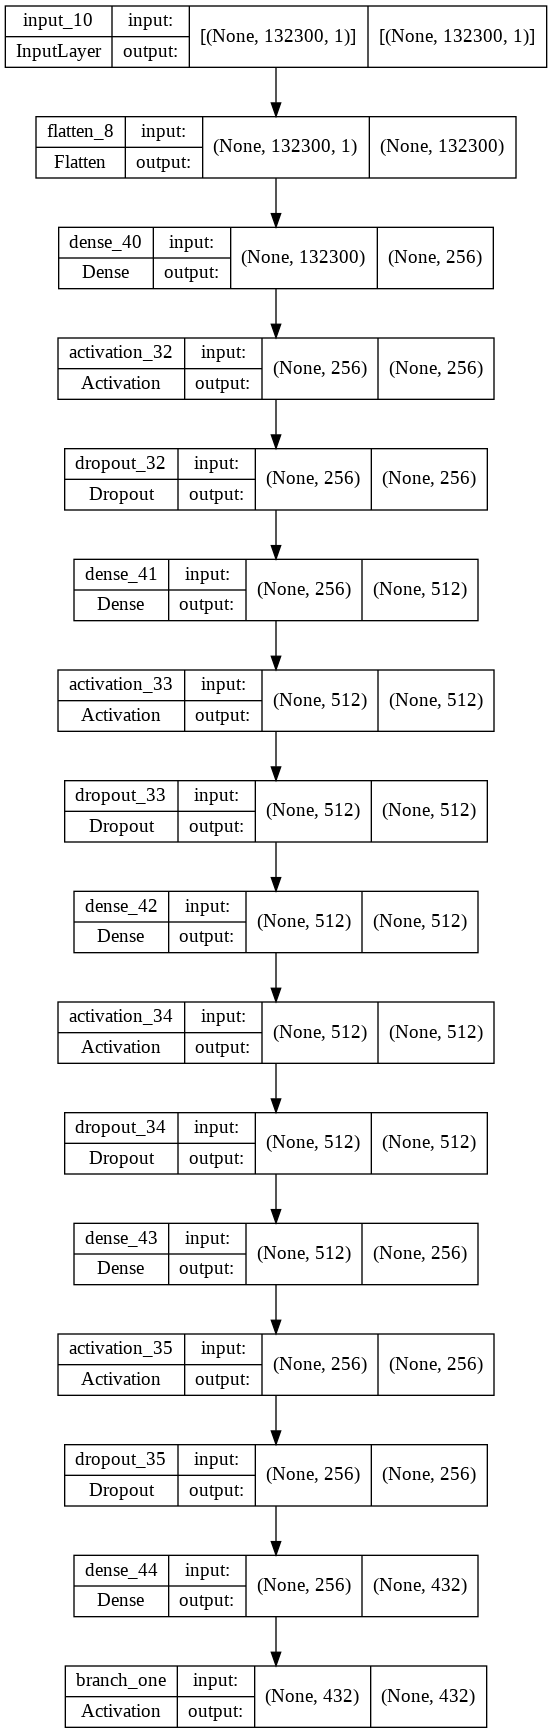

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:

init_lr = 1e-4
epochs = 100
# opt = Adam(lr=init_lr, decay=init_lr / epochs)
# opt = keras.optimizers.Adam(0.01)
model.compile(optimizer='Adam', 
              loss={
                  'branch_one': 'categorical_crossentropy', 
              },
              metrics={
                  'branch_one': 'accuracy', 
                  })

# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,train_out, validation_split=0.33, shuffle=True,
                    epochs=500,
                    ) 

Epoch 1/500
41/41 [==============================] - 2s 46ms/step - loss: 6.0522 - accuracy: 0.0054 - val_loss: 6.0114 - val_accuracy: 0.0187
Epoch 2/500
41/41 [==============================] - 1s 25ms/step - loss: 5.8813 - accuracy: 0.0115 - val_loss: 5.9266 - val_accuracy: 0.0187
Epoch 3/500
41/41 [==============================] - 1s 22ms/step - loss: 5.7607 - accuracy: 0.0138 - val_loss: 5.9380 - val_accuracy: 0.0187
Epoch 4/500
41/41 [==============================] - 1s 22ms/step - loss: 5.7165 - accuracy: 0.0130 - val_loss: 5.9572 - val_accuracy: 0.0218
Epoch 5/500
41/41 [==============================] - 1s 22ms/step - loss: 5.6822 - accuracy: 0.0169 - val_loss: 5.9773 - val_accuracy: 0.0202
Epoch 6/500
41/41 [==============================] - 1s 22ms/step - loss: 5.6390 - accuracy: 0.0161 - val_loss: 6.0084 - val_accuracy: 0.0218
Epoch 7/500
41/41 [==============================] - 1s 22ms/step - loss: 5.6280 - accuracy: 0.0169 - val_loss: 6.0057 - val_accuracy: 0.0187
Epoch 

In [ ]:
# _,accuracy = model.evaluate(X_train, y_train)
# print('train set accuracy: %.2f' % (accuracy*100) )
# _,accuracy = model.evaluate(X_test, y_test)
# print('test set accuracy: %.2f' % (accuracy*100) )

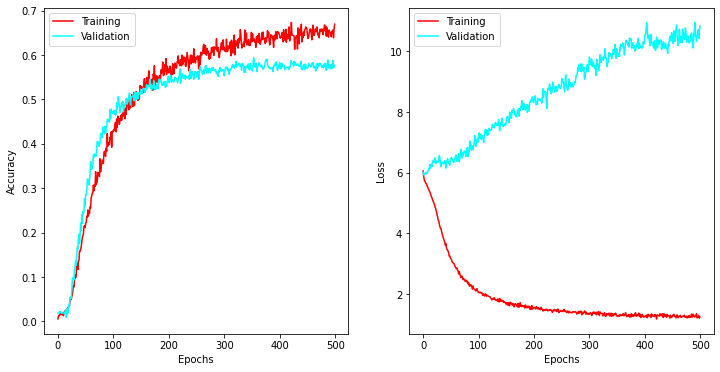

In [ ]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # jumlah row, jumlah column, column/row berapa
plt.plot(train_acc, label='Training', color = 'red')
plt.plot(val_acc, label='Validation', color = 'aqua')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2) # jumlah row, jumlah column, column/row berapa
plt.plot(train_loss, label='Training', color = 'red')
plt.plot(val_loss, label='Validation', color = 'aqua')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
# import matplotlib.pyplot as plt

# train_acc = history.history['branch_one_accuracy']
# train_loss = history.history['branch_one_loss']
# val_acc = history.history['val_branch_one_accuracy']
# val_loss = history.history['val_branch_one_loss']

# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1) # jumlah row, jumlah column, column/row berapa
# plt.plot(train_acc, label='Training', color = 'red')
# plt.plot(val_acc, label='Validation', color = 'aqua')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.subplot(1, 2, 2) # jumlah row, jumlah column, column/row berapa
# plt.plot(train_loss, label='Training', color = 'red')
# plt.plot(val_loss, label='Validation', color = 'aqua')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

In [ ]:
# import matplotlib.pyplot as plt

# train_acc = history.history['branch_two_accuracy']
# train_loss = history.history['branch_two_loss']
# val_acc = history.history['val_branch_two_accuracy']
# val_loss = history.history['val_branch_two_loss']

# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1) # jumlah row, jumlah column, column/row berapa
# plt.plot(train_acc, label='Training', color = 'red')
# plt.plot(val_acc, label='Validation', color = 'aqua')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.subplot(1, 2, 2) # jumlah row, jumlah column, column/row berapa
# plt.plot(train_loss, label='Training', color = 'red')
# plt.plot(val_loss, label='Validation', color = 'aqua')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

In [ ]:
# import matplotlib.pyplot as plt

# train_acc = history.history['branch_three_accuracy']
# train_loss = history.history['branch_three_loss']
# val_acc = history.history['val_branch_three_accuracy']
# val_loss = history.history['val_branch_three_loss']

# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1) # jumlah row, jumlah column, column/row berapa
# plt.plot(train_acc, label='Training', color = 'red')
# plt.plot(val_acc, label='Validation', color = 'aqua')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.subplot(1, 2, 2) # jumlah row, jumlah column, column/row berapa
# plt.plot(train_loss, label='Training', color = 'red')
# plt.plot(val_loss, label='Validation', color = 'aqua')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

In [ ]:
# import matplotlib.pyplot as plt

# train_acc = history.history['branch_four_accuracy']
# train_loss = history.history['branch_four_loss']
# val_acc = history.history['val_branch_four_accuracy']
# val_loss = history.history['val_branch_four_loss']

# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1) # jumlah row, jumlah column, column/row berapa
# plt.plot(train_acc, label='Training', color = 'red')
# plt.plot(val_acc, label='Validation', color = 'aqua')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.subplot(1, 2, 2) # jumlah row, jumlah column, column/row berapa
# plt.plot(train_loss, label='Training', color = 'red')
# plt.plot(val_loss, label='Validation', color = 'aqua')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

In [ ]:
X_test[0].shape

(132300,)

In [ ]:
import tensorflow


In [ ]:
prediction = model.predict(np.reshape(X_test[12], (1,132300)))

In [ ]:
prediction

array([[2.7916672e-37, 0.0000000e+00, 4.9887180e-29, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 2.1157387e-33, 4.4686406e-19,
        0.0000000e+00, 7.1279164e-33, 0.0000000e+00, 1.4086110e-27,
        0.0000000e+00, 2.6565096e-23, 2.7817228e-18, 0.0000000e+00,
        0.0000000e+00, 9.2524020e-33, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0428617e-18, 0.0000000e+00, 1.8162316e-31,
        0.0000000e+00, 4.7742149e-37, 8.3887397e-20, 0.0000000e+00,
        5.5889264e-31, 5.6907421e-19, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.2775938e-19,
        0.0000000e+00, 7.7809777e-38, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 7.4205940e-20, 2.8945137e-23, 0.0000000e+00,
        1.0151434e-24, 1.0256299e-31, 0.0000000e+00, 0.0000000e+00,
        5.7396447e-26, 3.0381916e-18, 0.0000000e+00, 0.0000000e+00,
        2.7383889e-17, 1.7323929e-12, 4.2343205e-11, 4.3506488e-25,
        1.0675087e-11, 4.6501855e-24, 2.8535030e

In [ ]:
print(prediction.argmax())
# print(prediction[1].argmax())
# print(prediction[2].argmax())

234


In [ ]:
y_test[12]

234

In [ ]:
model.save('note_recognition.h5') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r "note_recognition.h5" "/content/drive/MyDrive/note_recognition.h5"